<h1>MAPR 2451: Tight-Binding Tutorial</h1>


<hr>
<h2> Understanding the Tight-Binding Approximation</h2>


<p>The <a href="http://en.wikipedia.org/wiki/Tight_binding">tight-binding</a> approximation is a widely used method in condensed matter physics to describe the electronic structure of materials.  The electronic wavefunctions are represented as linear combinations of atomic orbitals. Instead of computing the elements of the tight-binding Hamiltonian directly, they are typically fitted to experimental data or more advanced calculations. In many cases, this approach provides qualitative insights at a significantly lower computational cost compared to first-principles methods.

<h3 style="color:#0B69A5;"> Wavefunctions as a Combination of Atomic Orbitals</h3>

<p>In quantum mechanics, the behavior of an electron is determined by the Schrödinger equation. Within the tight-binding model, we approximate the electron’s wavefunction as a sum of atomic orbitals centered at atomic sites in the crystal lattice. </p>
<p>$$ \Psi(\vec{r}) = \sum_{i,\alpha} \, c_{i}(\vec{R}_{\alpha}) \, \phi_{i}(\vec{r}-\vec{R}_{\alpha}) = \sum_{\mu} \, c_{\mu} \, \phi_{\mu}(\vec{r}) $$</p>
<p>Here, \( i \) indexes atomic energy levels, and \( \vec{R}_{\alpha} \) denotes the position of atom \( \alpha \) in the crystal lattice. The second equality introduces a combined index \( \mu \) to label pairs \( (\alpha, i) \).</p>

<h3 style="color:#0B69A5;"> Periodic Structure and Bloch Theorem</h3>

<p>Since we are dealing with crystalline materials, the electron wavefunctions must respect the periodicity of the crystal lattice. According to <a href="http://en.wikipedia.org/wiki/Bloch_theorem">Bloch’s theorem</a>, electron states in a periodic system can be written as a plane wave multiplied by a periodic function.
<p>$$ \Psi^{k}(\vec{r}) = e^{i\vec{k}.\vec{r}}\ \  u^{k}(\vec{r}) $$</p>

<p>where \( \vec{k} \) is the wavevector, and \( u(\vec{r}) \) has the periodicity of the potential. Under translation by a lattice vector \( \vec{R}_l \), the wavefunction transforms as:</p>

<p>$$ \Psi^{k}(\vec{r}+\vec{R}_l) = e^{i\vec{k}.\vec{R}_l}\ \ \Psi^{k}(\vec{r}) $$ This means that shifting the entire wavefunction by a lattice vector simply multiplies it by a phase factor, ensuring that the electronic states remain consistent with the crystal’s symmetry.</p>

<p>In a solid, there is an <b>infinite number of electrons</b>, which are distributed over an infinite number of wavevectors <b>k</b> in reciprocal space. However, at each k-point, only a <b>finite number</b> of electronic states are occupied. Bloch’s theorem transforms the task of calculating an infinite number of electronic wavefunctions into the more manageable problem of determining a finite set of wavefunctions at an infinite number of k-points.</p>

<p>In practical calculations, we typically approximate this by sampling a finite number of k-points within the first <a href="http://en.wikipedia.org/wiki/Brillouin_zone">Brillouin zone</a>, allowing us to construct the electronic band structure of the material efficiently.</p>

<h3 style="color:#0B69A5;"> Translational Symmetry in Reciprocal Space </h3>


<div class="rblock">
    <img align='right' src='https://upload.wikimedia.org/wikipedia/commons/5/56/BlochWaves1D.svg' height="340" width="340">
</div>

<p>
    According to <a href="http://en.wikipedia.org/wiki/Bloch_wave">Bloch's theorem</a>, the eigenstates of an electron in a periodic potential take the form of Bloch waves:  
</p>

<p>$$ \Psi^{k}(\vec{r}) = e^{i\vec{k}.\vec{r}}\ \  u^{k}(\vec{r}) $$</p>



<p>
    A key consequence of Bloch's theorem is that the wavevector <b>$\vec{k}$</b> is not unique: an electronic state labeled by <b>$\vec{k}$</b> is physically indistinguishable from a state labeled by <b>$\vec{k}+\vec{K}$</b>, where <b>$\vec{K}$</b> is any <a href="http://en.wikipedia.org/wiki/Reciprocal_lattice">reciprocal lattice vector</a>. This periodicity in reciprocal space is illustrated in Fig. 1, where the same Bloch wave is expressed using two different wavevectors, $\vec{k}_1$ and $\vec{k}_2$, whose difference is a reciprocal lattice vector. The periodic function <b>$u(\vec{r})$</b> remains unchanged, confirming that both representations describe the same physical state.
</p>

<p>
    This redundancy means that the set of unique wavevectors can be restricted to a single primitive unit of reciprocal space: the <a href="http://en.wikipedia.org/wiki/Brillouin_zone">first Brillouin zone</a>. The first Brillouin zone is defined as the region enclosed by <a href="http://en.wikipedia.org/wiki/Bragg_plane">Bragg planes</a>, which separate equivalent points in reciprocal space. To fully characterize the electronic band structure of a crystal, we only need to examine the wavevectors within this zone.
</p>




<h3 style="color:#0B69A5;"> Building the Tight-Binding Hamiltonian</h3>


<p>The stationary states of the system satisfy the time-independent Schrödinger equation:</p>

<p>$$ \hat{H}\, |\Psi^k_j \rangle = E^k_j\ \ |\Psi^k_j\rangle $$</p>

<p>Substituting \Psi^k_j by the Block state expanded as a linear combination of atomic orbitals leads to a <a href="http://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Generalized_eigenvalue_problem">generalized eigenvalue equation</a>:</p>

<p>$$ H^k_{\nu \mu} \ \ c^k_{j,\mu} = E^k_j\ \ S_{\nu \mu} \ \ c^k_{j,\mu} . $$</p>

<p>If the atomic orbitals \( \{ \phi_{\mu}\} \) are assumed mutually orthogonal, this equation simplifies to a standard <a href="http://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors">eigenvalue problem</a>:</p>

<p>$$ H^k_{\nu \mu} \ \ c^k_{j,\mu} = E^k_j\ \ c^k_{j,\nu} . $$</p>

The <b>Hamiltonian matrix</b> $ H^k_{\nu \mu} $ is a key quantity in the tight-binding method. It is a square matrix of shape ($N_{\mu}\times N_{\mu}$), where $N_{\mu}$ is the number of atomic orbitals used for the expansion of the Bloch function in the crystal unit-cell. The diagonal elements of the Hamiltonian matrix are the <b>on-site energies</b>. These represent the energy of an electron when it remains on the same atomic site. The off-diagonal elements are the  <b>hopping integrals</b>. These describe how easily an electron can move (or "hop") from one atomic site to another. The <b>overlap matrix</b> $ S_{\nu \mu} $ is a square matrix of shape ($N_{\mu}\times N_{\mu}$) that describe the inter-relationship of the atomic orbitals used as basis vectors for the tight-binding represeantation.

<p>By solving the eigenvalue equation of this Hamiltonian for all \( \vec{k} \) within the first <a href="http://en.wikipedia.org/wiki/Brillouin_zone">Brillouin zone</a>, we obtain the possible energy levels of the electrons, forming the **electronic band structure** of the material. This band structure determines many important physical properties.</p>

<h3 style="color:#0B69A5;"> Approximations and Parametrizations</h3>

<p>The elements of the tight-binding Hamiltonian matrix are:</p>

<p>$$ H^k_{\nu \mu} =  
    \sum_{(\mu' \equiv \mu)}\,  e^{i\vec{k}.(\vec{R}_{\mu'}-\vec{R}_{\nu})}\, \langle \phi_{\nu}\, | \hat{H}\,| \phi_{\mu'}\rangle $$</p>

<p>Here the sum $\sum_{(\mu' \equiv \mu)}$ extend over all orbitals $\mu'$ that are equivalent to $\mu$ by crystal translational symmetry. Expanding the Hamiltonian,</p>

<p>$$ H_{\nu \mu}(\vec{k}) =
    \sum_{(\mu' \equiv \mu)}\,  e^{i\vec{k}.(\vec{R}_{\mu'}-\vec{R}_{\nu})}\, \langle \phi_{\nu}\, | \sum_{\alpha} \left(\hat{H}^0_{\alpha} + \Delta\hat{U}_{\alpha} \right)\,| \phi_{\mu'}\rangle $$</p>

<p>where \( \hat{H}^0_{\alpha} \) is the Hamiltonian of an isolated atom and \( \Delta\hat{U}_{\alpha} \) accounts for modifications due to the crystal environment.</p>

<p>Since \( \Delta\hat{U}_{\alpha} \) is unknown, matrix elements are often fitted to experimental data or other theoretical calculations. One of the most widely used methods for parametrizing these elements is the <strong>Slater-Koster (SK) approach</strong>. In practice, we often start with a <strong>nearest-neighbor approximation</strong>, which captures the essential physics of graphene’s electronic structure. More accurate models refine this approach by including second and third nearest-neighbor interactions.</p>

<h3 style="color:#0B69A5;"> Slater-Koster Parameters: Concept and Notation</h3>

<p>The <a href="https://en.wikipedia.org/wiki/Tight_binding#Table_of_interatomic_matrix_elements">Slater-Koster method </a> provides a systematic way to express the hopping integrals \( \langle \phi_{\nu} | \hat{H} | \phi_{\mu'} \rangle \) in terms of a small set of transferable parameters that describe orbital interactions. Instead of computing matrix elements explicitly for every atomic configuration, the method approximates them based on:  
</p>

<ul>
    <li><strong>The type of atomic orbitals involved</strong>, assumed to be of the form, $$\phi_{\mu}(\vec{r})= \phi_{lc}(\vec{r}) = R_{l}(r) \ X_{lc}(\hat{r})$$ where l denotes the angular momentum quantum number, $r\equiv |\vec{r}|$, $R_l$ is a radial function and $X_{lc}$ is a cubic harmonic (e.g., $s$, $p_x$, or $d_{z^2}$ orbitals).</li>
    <li><strong>The direction of the interatomic bond</strong>. If two atoms are separated by a vector $( \vec{R} = (x,y,z) )$, the directional cosines are defined as:
    $$ l = \frac{x}{R}, \quad m = \frac{y}{R}, \quad n = \frac{z}{R} $$ </li>
    <li><strong>Bond integrals that describe the strength of particular interactions</strong>. The <a href="https://en.wikipedia.org/wiki/Tight_binding#Table_of_interatomic_matrix_elements">Slater-Koster parametrization</a> expresses the hopping integrals as $$ \langle \phi_{lc} | \hat{H} | \phi_{l'c'} \rangle = \sum_{\mu} g_{\mu}(lc,l'c',\hat{R})\ V_{l l' \mu}(R)$$ Here we have introduced the general notation for the bond integrals, $ V_{l l' \mu} $, where $l,\,l' \in \{s,p,d,...\}$ and $\mu \in \{\sigma, \pi, \delta, \phi, ... \}$ refer respectively to the angular momenta of the orbitals involved and their quantization about the bond axis $\vec{R}$. The expansion coefficients $g_{\mu}(lc,l'c',\hat{R})$ are simple geometric functions that have been tabulated.
    </li>
</ul>

<p>A key advantage of this formalism is that it reduces the complexity of the tight-binding model by expressing the hopping terms in terms of simple direction-dependent parametrized functions. The values of the bond integrals, commonly referred to as Slater-Koster parameters,  are usually determined empirically or fitted to experimental and theoretical data. By using just a few Slater-Koster parameters, one can describe the electronic structure of a wide range of materials with great efficiency.
</p>


<h3 style="color:#0B69A5;"> Why Use the Tight-Binding Method?</h3>

<p>The tight-binding approach is widely used because it provides a good balance between accuracy and computational efficiency. While it does not capture all quantum effects, it is particularly useful for:</p>

<ul>
    <li>Understanding <b>qualitative trends</b> in electronic structures.</li>
    <li>Qualitative modeling of materials where atomic-like orbitals are well-defined.</li>
    <li>Providing a foundation for more advanced models, such as density functional theory (DFT) and beyond.</li>
</ul>

<p>By adjusting parameters and incorporating additional effects, the tight-binding method provides a powerful tool for exploring the electronic properties of materials, from simple crystals to complex nanostructures.</p>


<hr>
<h2> An Example — The Tight-Binding Model of Graphene</h2>

<p>

<div class="rblock">
    <img align='right' src='https://github.com/sidubois/MAPR2451/blob/master/pics/graphene_structure.png?raw=1' height="350" width="300"> <br>
</div>

<a href="http://en.wikipedia.org/wiki/Graphene" target="_tab">Graphene</a> is a two-dimensional allotrope of carbon in which atoms are arranged in a hexagonal honeycomb lattice. The structural stability of graphene arises from the strong covalent bonding between carbon atoms, which results from <b>$sp^2$ hybridization</b>. In this hybridization process, the carbon <b>$2s$, $2p_x$, and $2p_y$</b> atomic orbitals combine to form $\sigma$-bonds that provide mechanical rigidity to the lattice.

However, these $\sigma$-bonds are not responsible for graphene’s remarkable electronic properties. The associated bonding and anti-bonding energy levels lie far from the <a href="http://en.wikipedia.org/wiki/Fermi_energy" target="_tab">Fermi level</a> (by more than $\delta E > 3$ eV). Instead, the low-energy electronic behavior of graphene—such as its ultra-high electron mobility and unique optical properties—is dictated by the remaining <b>$2p_z$</b> atomic orbitals, which give rise to a system of highly delocalized $\pi$-bonds.

This separation of energy scales allows us to describe the low-energy electronic structure of graphene using only the $p_z$ orbitals. In the following exercises, we start by deriving the tight-binding model for graphene within the so-called <b>$\pi$-band approximation</b>, where only the $\pi$-electrons are considered and we analyze its key features, including the famous <b>Dirac cone dispersion</b> at the K and K' points of the Brillouin zone, which gives rise to massless Dirac fermions.
</p>


<hr>
<h3 style="color:#0B69A5;">[ Exercise 1 ] $ $<br>
Compute the Band Structure of Graphene Using a simple Tight-Binding Model </h3>
<br>
<p>
In this exercise, we use the tight-binding approximation to calculate the electronic band structure of graphene. To keep the model simple, we make the following assumptions:
<ul>
    <li>Each carbon atom contributes only one $p_z$ orbital to the system.</li>
    <li>Electronic hopping is restricted to nearest-neighbor interactions.</li>
    <li>The hopping integral between neighboring sites $(V_{pp\pi})$ is set to <b>2.6 eV</b>, a value chosen to match experimental observations.</li>
</ul>
<br>
Your tasks:
<ul>
    <li>Plot the electronic band structure of graphene using this model.</li>
    <li>Based on your results, classify graphene as a <b>metal, semimetal, semiconductor, or insulator</b>. What do you observe?</li>
    <li>Modify the onsite energy and hoping terms and analyze how it affects the band structure. Can you explain the changes?</li>
</ul>
</p>


#### Import the required Python modules

In [4]:
!pip install git+https://github.com/sidubois/supertb

  Cloning https://github.com/sidubois/supertb to /tmp/pip-req-build-20gfinnf
  Running command git clone --filter=blob:none --quiet https://github.com/sidubois/supertb /tmp/pip-req-build-20gfinnf
  Resolved https://github.com/sidubois/supertb to commit 68f5682efc53f6948092702168367c5ab6d96458
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 45.1 MB/s eta 0:00:00
  Created wheel for supertb: fi

In [5]:
# Import the required Python modules
import supertb as tb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set figure size for better visualization
plt.rcParams['figure.figsize'] = (8, 6)

#### Define the atomic species

In [6]:
# Create a carbon atom species with a single pz orbital
carbon = tb.NumericalAtom('C', 'C', orbs=['pz'])

#### Create the crystal unit-cell

In [7]:
# Build the graphene structure
# Graphene has a honeycomb structure with a lattice constant of 2.46 Å.
# The unit cell contains two atoms at positions (0,0,0) and (1/3,1/3,0).

# Define the hexagonal lattice using lattice parameters (a, b, c, α, β, γ)
lattice = tb.Lattice.from_parameters(2.46, 2.46, 20., 90., 90., 60.)

# Define atomic positions in fractional coordinates
pos = [[0., 0., 0.], [1./3, 1./3, 0.]]

# Create the graphene structure using the lattice and atomic positions
struct = tb.Structure(lattice, ['C', 'C'], pos, coords_are_cartesian=False)

#### Define the interatomic interactions

In [8]:
# Create an atomic table that stores the defined atomic species
atomictable = tb.AtomicTable(carbon)

# Define the type of tight-binding model
# Here, we use the Slater-Koster approach without spin polarization and
# without spin-orbit coupling
sk = tb.SlaterKosterParams(atomictable, spinpol=False, spinorb=False)

# Set the onsite energy for the pz orbitals
# This is typically set to zero as a reference energy level
sk.set_local_integrals([('C', 0, 0, 0.)])

# Define the hopping parameter (nearest-neighbor interaction)
# The hopping integral between two neighboring carbon atoms is set to 2.6 eV
# The bond integral [Vpp𝜋] iq labelled [3] in Supertb
sk.set_non_local_integrals([('C', 'C', 0, 0, 3, 2.6)])

#### Construct the tight-binding model

In [9]:
# Construct a graph representation of the structure
# A cutoff radius of 1.45 Å ensures that only nearest-neighbor interactions
# are considered
graph = tb.StructureGraph.init_from_structure(struct, 1.45)

# Use the graph representation and the tight-binding parameters to build
# the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/usr/local/lib/python3.11/dist-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


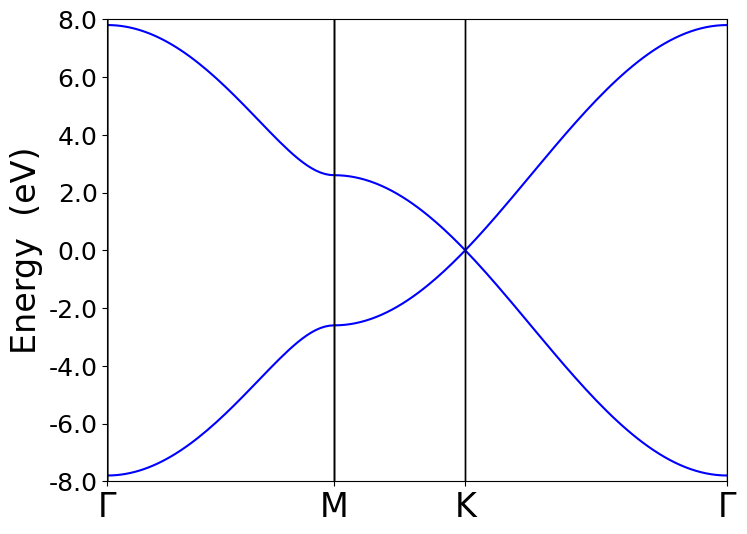

In [10]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M → K → Γ
kbands = [[0., 0., 0.], [0.5, 0., 0.],  # Γ → M
          [0.5, 0., 0.], [2./3., 1./3., 0.],  # M → K
          [2./3., 1./3., 0.], [0., 0., 0.]]  # K → Γ

# Number of k-points along each segment for smooth band structure plotting
nkpts = [50, 50, 50]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'],
                 vertices=[0, 50, 100, 150],
                 spincolors=['blue'],
                 linestyle='-', emin=-8., emax=8.)

# Display the band structure plot
plt.show()

<h3 style="color:#0B69A5;">[ Exercise 2] $ $<br> Extending the Tight-Binding Model to Four Orbitals per Site </h3>

<p>
    In the previous exercise, we considered a simple tight-binding model for graphene using only the $p_z$ orbital at each carbon site. However, graphene atoms also possess $s$, $p_x$, and $p_y$ orbitals, which influence the electronic structure at higher energies.
</p>

<p>
    In this exercise, we extend the model to include all four valence orbitals per site: {$s$, $p_x$, $p_y$, $p_z$}. The full tight-binding Hamiltonian now includes not only the $\pi$ bands but also the $\sigma$ bands formed by the $s$ and $p_{x,y}$ orbitals.
</p>

<h4>Tasks:</h4>

<ul>
    <li> Modify the tight-binding model to include four orbitals per site: $s$, $p_x$, $p_y$, and $p_z$.</li>
    <li> Include the relevant <a target="_tab" href="https://en.wikipedia.org/wiki/Slater%E2%80%93Koster_parameters"> Slater-Koster parameters </a> for $s$-$s$, $s$-$p$, and $p$-$p$ interactions.</li>
    <li> Compute and plot the new band structure.</li>
    <li> Compare it to the original $\pi$-band-only model. What new features appear in the band structure?</li>
    <li> Identify the energy range of the $\sigma$ and $\pi$ bands. Why are they separated?</li>
</ul>

<h4>Hints:</h4>

<ul>
    <li> The $\sigma$-bands arise from in-plane $s$ and $p_{x,y}$ bonding, whereas the $\pi$-bands come from out-of-plane $p_z$ orbitals.</li>
    <li> The nearest-neighbor hopping parameters for the $\sigma$-bonds differ from those of the $\pi$-bands.</li>
    <li> The energy range of $\sigma$-bands typically extends much further from the Fermi level compared to $\pi$-bands.</li>
</ul>

<p>
    Once you have completed the exercise, reflect on the implications of including multiple orbitals per site. How does this change our understanding of graphene's electronic properties?
</p>


#### Define the atomic species

In [11]:
# Create a carbon atom species with a single pz orbital
carbon = tb.NumericalAtom('C','C',orbs=['s','px','py','pz'])

#### Define the interatomic interactions

In [12]:
# Create an atomic table that stores the defined atomic species
atomictable = tb.AtomicTable(carbon)

# Define the type of tight-binding model
# Here, we use the Slater-Koster approach without spin polarization and
# without spin-orbit coupling
sk = tb.SlaterKosterParams(atomictable, spinpol=False, spinorb=False)

# Set the onsite energy for the s, px, py and pz orbitals
sk.set_local_integrals([('C', 0, 0, -4.25956174899)])
sk.set_local_integrals([('C', 1, 1,  0.0476436867717)])
sk.set_local_integrals([('C', 2, 2,  0.0476436867717)])
sk.set_local_integrals([('C', 3, 3,  0.0476436867717)])

# Define the hopping parameter (nearest-neighbor interaction)
# The bond integrals [Vssσ,Vspσ,Vppσ,Vpp𝜋] are labelled [0,1,2,3] in supertb
sk.set_non_local_integrals([('C', 'C', 0, 0, 0,  4.99016309759)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 1,  4.93523388607)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 2, -4.06687028938)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 3,  2.61251108391)])

#### Construct the tight-binding model

In [13]:
# Construct a graph representation of the structure
# A cutoff radius of 1.45 Å ensures that only nearest-neighbor interactions
# are considered
graph = tb.StructureGraph.init_from_structure(struct, 1.45)

# Use the graph representation and the tight-binding parameters to build
# the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/usr/local/lib/python3.11/dist-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


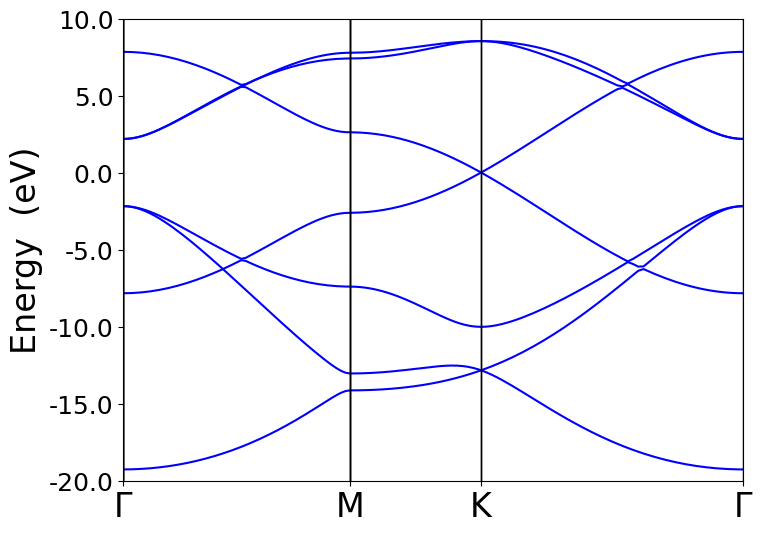

In [14]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M → K → Γ
kbands = [[0., 0., 0.], [0.5, 0., 0.],  # Γ → M
          [0.5, 0., 0.], [2./3., 1./3., 0.],  # M → K
          [2./3., 1./3., 0.], [0., 0., 0.]]  # K → Γ

# Number of k-points along each segment for smooth band structure plotting
nkpts = [50, 50, 50]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'],
                 vertices=[0, 50, 100, 150],
                 spincolors=['blue'],
                 linestyle='-', emin=-20., emax=10.)

# Display the band structure plot
plt.show()

<h3 style="color:#0B69A5;">[ Exercise 3] $ $<br> Extending the Tight-Binding Model – Beyond Nearest Neighbors</h3>

<p>
    In this exercise, we refine the tight-binding model by extending the interaction range beyond nearest neighbors and incorporating a radial dependence for the hopping parameters.
</p>

<h4>Objectives:</h4>

<ul>
    <li>Understand the role of <b>cutoff radius</b> in tight-binding models.</li>
    <li>Investigate how including <b>next-nearest-neighbor (NNN)</b> hopping modifies the band structure.</li>
    <li>Introduce a <b>distance-dependent function</b> for the hopping parameters.</li>
</ul>

<h4>Tasks:</h4>

<ol>
    <li>
        <b>Increase the cutoff radius</b> in the tight-binding model:
        <ul>
            <li>Start with the usual nearest-neighbor model (cutoff ~1.45 Å for graphene).</li>
            <li>Increase the cutoff to include next-nearest neighbors (~2.5 Å).</li>
            <li>Compute the new band structure. What changes do you observe?</li>
        </ul>
    </li>
    <li>
        <b>Modify the hopping integrals</b> to include a radial dependence:
        <ul>
            <li>Use a simple exponential decay for the hopping parameter:</li>
        </ul>
        <p class="math">
            $$ t(d) = t_0 e^{-(d - d_0)/l_d} $$
        </p>
        <ul>
            <li>Here, \( d \) is the interatomic distance, ( $d_0 = 1.42$ Å ) is the reference bond length, and \( \lambda \) controls the decay.</li>
            <li>Implement this function in the code and analyze the effect on the band structure.</li>
        </ul>
    </li>
</ol>


#### Define the interatomic interactions

In [ ]:
# Create an atomic table that stores the defined atomic species
atomictable = tb.AtomicTable(carbon)

# Define the radial dependance of bond integrals
def radial_func(hopping,length):
    decay = .45
    return hopping*np.exp(-(length-1.42)/decay)

# Define the type of tight-binding model
# Here, we use the Slater-Koster approach without spin polarization and
# without spin-orbit coupling
sk = tb.SlaterKosterParams(atomictable, spinpol=False, spinorb=False, \
                           radialf=radial_func)

# Set the onsite energy for the s, px, py and pz orbitals
sk.set_local_integrals([('C', 0, 0, -4.25956174899)])
sk.set_local_integrals([('C', 1, 1,  0.0476436867717)])
sk.set_local_integrals([('C', 2, 2,  0.0476436867717)])
sk.set_local_integrals([('C', 3, 3,  0.0476436867717)])

# Define the hopping parameter (nearest-neighbor interaction)
# The bond integrals [Vssσ,Vspσ,Vppσ,Vpp𝜋] are labelled [0,1,2,3] in supertb
sk.set_non_local_integrals([('C', 'C', 0, 0, 0,  4.99016309759)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 1,  4.93523388607)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 2, -4.06687028938)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 3,  2.61251108391)])

#### Construct the tight-binding model

In [ ]:
# Construct a graph representation of the structure.
# A cutoff radius of 2.5 Å ensures that nearest-neighbor and
# next-nearest-neighbor interactions are considered
graph = tb.StructureGraph.init_from_structure(struct, 2.5)

# Use the graph representation and the tight-binding parameters to build
# the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/Users/sdubois/anaconda3/envs/MAPR2451/lib/python3.12/site-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


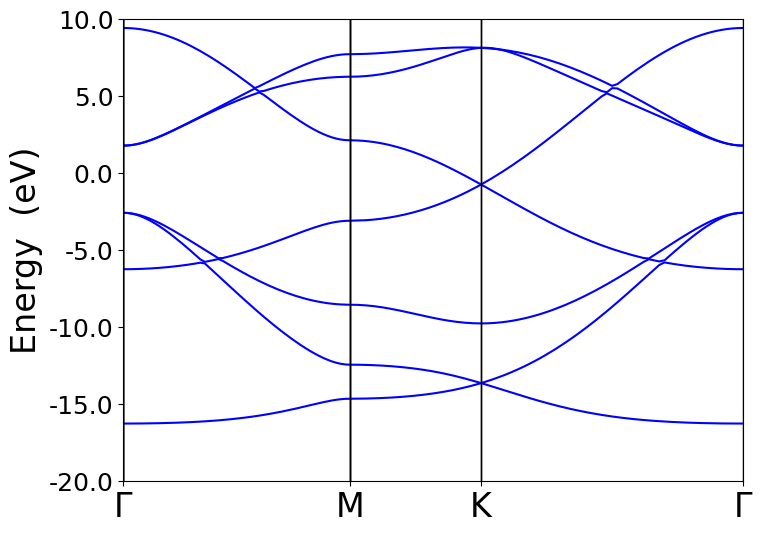

In [ ]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M → K → Γ
kbands = [[0., 0., 0.], [0.5, 0., 0.],  # Γ → M
          [0.5, 0., 0.], [2./3., 1./3., 0.],  # M → K
          [2./3., 1./3., 0.], [0., 0., 0.]]  # K → Γ

# Number of k-points along each segment for smooth band structure plotting
nkpts = [50, 50, 50]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'],
                 vertices=[0, 50, 100, 150],
                 spincolors=['blue'],
                 linestyle='-', emin=-20., emax=10.)

# Display the band structure plot
plt.show()

<h3 style="color:#0B69A5;">[ Exercise 4] $ $ <br> Adapting the Graphene Model to Hexagonal Boron Nitride (hBN) </h3>

<p>
    In this exercise, we extend the tight-binding model developed for graphene to describe the electronic structure of <a target="_tab" href="https://en.wikipedia.org/wiki/Hexagonal_boron_nitride"> hexagonal boron nitride (hBN)</a>. Like graphene, hBN has a hexagonal lattice, but unlike graphene, its two sublattices are occupied by different atomic species: one by Boron (B) and the other by Nitrogen (N).
</p>

<p>
    This atomic difference lowers the symmetry of the system compared to graphene. While graphene’s honeycomb lattice is inversion-symmetric, hBN lacks this symmetry due to the difference in onsite energies between Boron and Nitrogen. This modification significantly alters the band structure.
</p>

<h4>Tasks:</h4>

<ul>
    <li> Modify the tight-binding model for graphene by introducing different onsite energies for Boron ($E_B$) and Nitrogen ($E_N$).</li>
    <li> Use the same nearest-neighbor hopping parameter as in graphene (2.6 eV).</li>
    <li> Compute and plot the band structure of hBN.</li>
    <li> Compare the hBN band structure to that of graphene. What is the most striking difference?</li>
    <li> How does the **broken sublattice symmetry** affect the electronic properties?</li>
</ul>

<h4>Hints:</h4>

<ul>
    <li> In graphene, the conduction and valence bands meet at the **Dirac points**, making it a semimetal.</li>
    <li> The presence of two different atoms in the unit cell breaks **inversion symmetry**, opening an **energy gap at the Dirac points**.</li>
    <li> The size of the band gap is proportional to the **difference in onsite energies**: $E_B - E_N$.</li>
    <li> hBN behaves as an **insulator**, unlike graphene which is a semimetal.</li>
</ul>

<p>
    Once you have computed the band structure, discuss the **importance of sublattice symmetry** in determining electronic properties. How does hBN compare to materials like graphene or traditional semiconductors?
</p>


#### Define the atomic species

In [ ]:
# Create a boron and nitrogen atom species with a single pz orbital
boron = tb.NumericalAtom('B','B',orbs=['pz'])
nitrogen = tb.NumericalAtom('N','N',orbs=['pz'])

#### Create the crystal unit-cell

In [ ]:
# Build the hBN structure
# Like graphene, hBN has a hexagonal lattice, but unlike graphene,
# its two sublattices are occupied by different atomic species:
# one by Boron (B) and the other by Nitrogen (N)

# Define the hexagonal lattice using lattice parameters (a, b, c, α, β, γ)
lattice = tb.Lattice.from_parameters(2.46, 2.46, 20., 90., 90., 60.)

# Define atomic positions in fractional coordinates
pos = [[0., 0., 0.], [1./3, 1./3, 0.]]

# Create the hBN structure using the lattice and atomic positions
struct = tb.Structure(lattice, ['B', 'N'], pos, coords_are_cartesian=False)

#### Define the interatomic interactions

In [ ]:
# Create an atomic table that stores the defined atomic species
atomictable = tb.AtomicTable(boron, nitrogen)

# Define the radial dependance of bond integrals
def radial_func(hopping,length):
    decay = .45
    return hopping*np.exp(-(length-1.42)/decay)

# Define the type of tight-binding model
# Here, we use the Slater-Koster approach without spin polarization and
# without spin-orbit coupling
sk = tb.SlaterKosterParams(atomictable, spinpol=False, spinorb=False, \
                           radialf=radial_func)

# Set the onsite energy for the boron and nitrogen pz orbitals
sk.set_local_integrals([('B', 0, 0, -2.5)])
sk.set_local_integrals([('N', 0, 0, +2.5)])

# Define the hopping parameter (nearest-neighbor interaction)
# The bond integral [Vpp𝜋] iq labelled [3] in Supertb
sk.set_non_local_integrals([('B','N', 0, 0, 3, 2.6)])

#### Construct the tight-binding model

In [ ]:
# Construct a graph representation of the structure
graph = tb.StructureGraph.init_from_structure(struct, 2.5)

# Use the graph representation and the tight-binding parameters
# to build the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/Users/sdubois/anaconda3/envs/MAPR2451/lib/python3.12/site-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


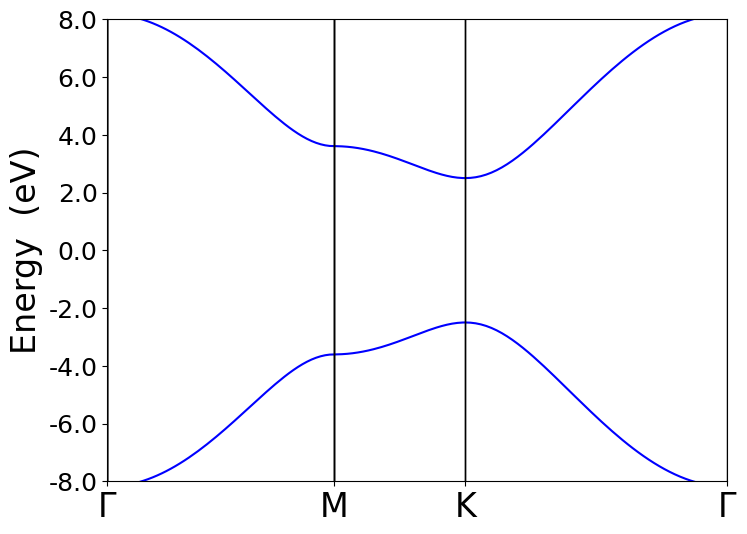

In [ ]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M → K → Γ
kbands = [[0., 0., 0.], [0.5, 0., 0.],  # Γ → M
          [0.5, 0., 0.], [2./3., 1./3., 0.],  # M → K
          [2./3., 1./3., 0.], [0., 0., 0.]]  # K → Γ

# Number of k-points along each segment for smooth band structure plotting
nkpts = [50, 50, 50]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'],
                 vertices=[0, 50, 100, 150],
                 spincolors=['blue'],
                 linestyle='-', emin=-8., emax=8.)

# Display the band structure plot
plt.show()

<h3 style="color:#0B69A5;">[ Exercise 5 ] $ $<br> Band Folding and Defects in hBN Supercells </h3>

<p>
    In this exercise, we extend our tight-binding model of hexagonal boron nitride (hBN) to investigate the effects of using larger supercells and introducing vacancies. The goal is to understand how **band folding** emerges as the supercell size increases and how defects modify the electronic structure.
</p>

<h4>Part 1: Band Folding in hBN Supercells</h4>

<ul>
    <li> Construct hBN supercells of increasing size (e.g., $2 \times 2$, $3 \times 3$, $4 \times 4$ unit cells).</li>
    <li> Compute and plot the band structure for each supercell.</li>
    <li> Observe how the band structure evolves as the supercell size increases. </li>
    <li> How does the band structure compare to that of the primitive unit cell? Can you identify the band folding effect?</li>
</ul>

<p>
    <b>Hint:</b> The Brillouin zone of a supercell is smaller than that of the primitive cell. As a result, electronic states from the larger Brillouin zone of the primitive cell get "folded" into the smaller Brillouin zone of the supercell. This leads to an apparent increase in the number of bands.
</p>

<h4>Part 2: Introducing a Vacancy</h4>

<ul>
    <li> Create a vacancy by removing a single atom from the supercell.</li>
    <li> Compute and plot the band structure.</li>
    <li> Increase the supercell size and observe how the band structure changes.</li>
    <li> What new features appear in the band structure? How do the localized defect states behave as the supercell grows?</li>
</ul>

<p>
    <b>Hint:</b> In a finite supercell, defects are periodically repeated. As the supercell size increases, the vacancy-induced states become more localized in real space, which affects their dispersion in reciprocal space.
</p>

<h4>Key Questions:</h4>

<ul>
    <li> How does the band folding mechanism relate to the translational symmetry of the lattice in reciprocal space?</li>
    <li> What happens to the band gap when you introduce a vacancy?</li>
    <li> Do vacancy states appear within the band gap? If so, why?</li>
    <li> How do these defect states evolve with increasing supercell size?</li>
</ul>

<p>
    Understanding band folding is crucial for analyzing the electronic structure of quasi-periodic systems, heterostructures, and moiré materials. Likewise, defects play a major role in the properties of real materials, influencing their electrical and optical behavior.
</p>


#### Create the crystal unit-cell

In [ ]:
# Build the hBN structure

# Define the hexagonal lattice using lattice parameters (a, b, c, α, β, γ)
lattice = tb.Lattice.from_parameters(2.46, 2.46, 20., 90., 90., 60.)

# Define atomic positions in fractional coordinates
pos = [[0., 0., 0.], [1./3, 1./3, 0.]]

# Create the hBN structure using the lattice and atomic positions
struct = tb.Structure(lattice, ['B', 'N'], pos, coords_are_cartesian=False)

#### Create the crystal super-cell

In [ ]:
struct.make_supercell([2,2,1])

Structure Summary
Lattice
    abc : 4.92 4.92 20.0
 angles : 90.0 90.0 59.99999999999999
 volume : 419.26714668335273
      A : np.float64(4.92) np.float64(0.0) np.float64(3.0126311259024886e-16)
      B : np.float64(2.4600000000000004) np.float64(4.260844986619438) np.float64(3.0126311259024886e-16)
      C : np.float64(0.0) np.float64(0.0) np.float64(20.0)
    pbc : True True True
PeriodicSite: B (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: B (1.23, 2.13, 1.506e-16) [0.0, 0.5, 0.0]
PeriodicSite: B (2.46, 0.0, 1.506e-16) [0.5, 0.0, 0.0]
PeriodicSite: B (3.69, 2.13, 3.013e-16) [0.5, 0.5, 0.0]
PeriodicSite: N (1.23, 0.7101, 1.004e-16) [0.1667, 0.1667, 0.0]
PeriodicSite: N (2.46, 2.841, 2.511e-16) [0.1667, 0.6667, 0.0]
PeriodicSite: N (3.69, 0.7101, 2.511e-16) [0.6667, 0.1667, 0.0]
PeriodicSite: N (4.92, 2.841, 4.017e-16) [0.6667, 0.6667, 0.0]

#### Create a vacancy by removing an atom

In [ ]:
#struct.remove_sites([1])

#### Construct the tight-binding model

In [ ]:
# Construct a graph representation of the structure
graph = tb.StructureGraph.init_from_structure(struct, 2.5)

# Use the graph representation and the tight-binding parameters to build
# the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/Users/sdubois/anaconda3/envs/MAPR2451/lib/python3.12/site-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


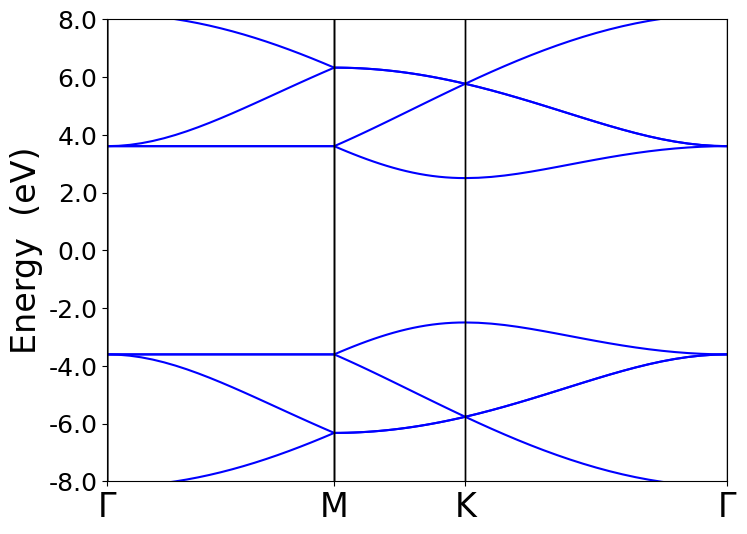

In [ ]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M → K → Γ
kbands = [[0., 0., 0.], [0.5, 0., 0.],  # Γ → M
          [0.5, 0., 0.], [2./3., 1./3., 0.],  # M → K
          [2./3., 1./3., 0.], [0., 0., 0.]]  # K → Γ

# Number of k-points along each segment for smooth band structure plotting
nkpts = [20, 20, 20]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'],
                 vertices=[0, 20, 40, 60],
                 spincolors=['blue'],
                 linestyle='-', emin=-8., emax=8.)

# Display the band structure plot
plt.show()

<hr>
<h2> The Electronic Structure of Carbon Nanotubes (CNTs) $ $</h2>

<div class="rblock">
    <img align='right' src='https://upload.wikimedia.org/wikipedia/commons/3/35/CNTnames.png' height="300" width="300">
</div>

<h3>Introduction to Carbon Nanotubes</h3>

<p>
    <a target="_tab" href="http://en.wikipedia.org/wiki/Carbon_nanotube#Single-walled">Carbon nanotubes</a> (CNTs) are cylindrical structures formed by rolling up a graphene sheet into a seamless tube.  A single-walled carbon nanotube (SWNT) is uniquely defined by a pair of indices <b>(n,m)</b>, which describe how the graphene sheet is wrapped. These indices correspond to unit vectors in the honeycomb lattice of graphene. Based on these values, CNTs can be classified into three main types:
</p>

<ul>
    <li> Zigzag CNTs   → (n,0)</li>
    <li> Armchair CNTs → (n,n)</li>
    <li> Chiral CNTs.  → (n,m) with n ≠ m and m ≠ 0</li>
</ul>

<p>
    The chiralityof a SWNT, determined by (n,m), plays a fundamental role in its electronic properties —specifically, whether it behaves as a metal or a semiconductor.
</p>

<hr />

<h3>Electronic Properties & the Band Folding Approximation</h3>

<p>
    The electronic properties of CNTs arise directly from the band structure of graphene. Interestingly, their metallic or semiconducting behavior can be determined <i>purely from their geometry</i>:
</p>

<ul>
    <li> If n = m, the nanotube is metallic.</li>
    <li> If (n − m) is a multiple of 3, the nanotube is a very small-bandgap semiconductor.</li>
    <li> Otherwise, the nanotube is a moderate-gap semiconductor.</li>
</ul>

<p>
    This simple <b>(n − m = 3j) rule</b> is a direct consequence of band folding in reciprocal space. To understand this, we use the Born–von Kármán boundary condition, which imposes a quantization of the wavevector perpendicular to the nanotube axis. A SWNT can be conceptualized as a rolled-up graphene sheet with periodic boundary conditions applied along its circumference. This periodicity forces the wavevector component along this direction to be quantized. Mathematically, the allowed wavevectors must fit within the periodicity of the nanotube, leading to discrete values for $k_{\perp}$.  
</p>

<p>
    As a result, only specific slices of graphene’s band structure remain accessible, determining whether the CNT will be metallic or semiconducting. This is the foundation of the (n − m = 3j) selection rule.
    <ul>
        <li>If a quantized $k_{\perp}$ passes through graphene's Dirac point, the CNT is <b>metallic</b>.</li>
        <li>If no quantized states align with the Dirac point, the CNT opens a band gap and is <b>semiconducting</b>.</li>
    </ul>
</p>

<div class="rblock">
    <img align='right' src='https://github.com/sidubois/MAPR2451/blob/master/pics/CNT_all.png?raw=1' height="350" width="1150">
</div>
<hr />


<h3 style="color:#0B69A5;">[ Exercise 6] <br><br>  Band Structure of Carbon Nanotubes</h3>

<p>
    In this exercise, we extend our tight-binding model to study the electronic properties of <b>carbon nanotubes (CNTs)</b>. Using the methodology developed for graphene, we apply periodic boundary conditions to simulate different CNT structures and analyze their band structures.
</p>

<h4 style="color:#0B69A5;">Objectives:</h4>

<ul>
    <li>Construct the tight-binding Hamiltonian for a given (n,m) CNT.</li>
    <li>Analyze the impact of the <b>Born–von Kármán boundary condition</b> on allowed wavevectors.</li>
    <li>Determine whether a given CNT is <b>metallic or semiconducting</b> using the <b>(n − m = 3j) rule</b>.</li>
    <li>Explore how the band gap evolves with <b>increasing CNT diameter</b>.</li>
</ul>

<h4 style="color:#0B69A5;">Questions:</h4>

<ol>
    <li>
        Compute the band structure of CNTs for different (n,m) values:
        <ul>
            <li>Try <b>(6,6)</b> (armchair CNT), <b>(10,0)</b> (zigzag CNT), and <b>(9,3)</b> (chiral CNT).</li>
            <li>What do you observe? Which ones are metallic? Which ones are semiconducting?</li>
        </ul>
    </li>
    <li>
        Investigate the <b>effect of CNT diameter</b> on the band gap:
        <ul>
            <li>Compute the band structure for a family of (n,0) zigzag CNTs with increasing n.</li>
            <li>How does the band gap evolve as the diameter increases?</li>
            <li>Is there a trend? Can you relate it to the band structure of graphene?</li>
        </ul>
    </li>
</ol>

<hr />


#### Import the required Python modules

In [ ]:
from nt import create_nt

#### Define the atomic species

In [ ]:
# Create a carbon atom species
carbon = tb.NumericalAtom('C','C',orbs=['s','px','py','pz'])

#### Creat the nanotube unit-cell

In [ ]:
# Build the structure
# The create_nt function that takes n and m as arguments
struct = create_nt(5,5)
print ('# atoms in unit-cell = ', struct.cart_coords.shape[0])

# atoms in unit-cell =  20


#### Define the interatomic interactions

In [ ]:
# Create an atomic table that stores the defined atomic species
atomictable = tb.AtomicTable(carbon)

# Define the type of tight-binding model
# Here, we use the Slater-Koster approach without spin polarization and
# without spin-orbit coupling
sk = tb.SlaterKosterParams(atomictable, spinpol=False, spinorb=False)

# Set the onsite energy for the s, px, py and pz orbitals
sk.set_local_integrals([('C', 0, 0, -4.25956174899)])
sk.set_local_integrals([('C', 1, 1,  0.0476436867717)])
sk.set_local_integrals([('C', 2, 2,  0.0476436867717)])
sk.set_local_integrals([('C', 3, 3,  0.0476436867717)])

# Define the hopping parameter (nearest-neighbor interaction)
# The bond integrals [Vssσ,Vspσ,Vppσ,Vpp𝜋] are labelled [0,1,2,3] in supertb
sk.set_non_local_integrals([('C', 'C', 0, 0, 0,  4.99016309759)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 1,  4.93523388607)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 2, -4.06687028938)])
sk.set_non_local_integrals([('C', 'C', 0, 0, 3,  2.61251108391)])

#### Create the tight-binding model

In [ ]:
# Construct a graph representation of the structure
graph = tb.StructureGraph.init_from_structure(struct, 1.45)

# Use the graph representation and the tight-binding parameters to build
# the electronic model
egraph = tb.ElectronicStructure(graph, atomictable, H=sk)

# Compute the Hamiltonian matrix elements
egraph.compute_integrals('H')

#### Compute and plot the band structure

/Users/sdubois/anaconda3/envs/MAPR2451/lib/python3.12/site-packages/supertb/eigenset.py:673: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels)


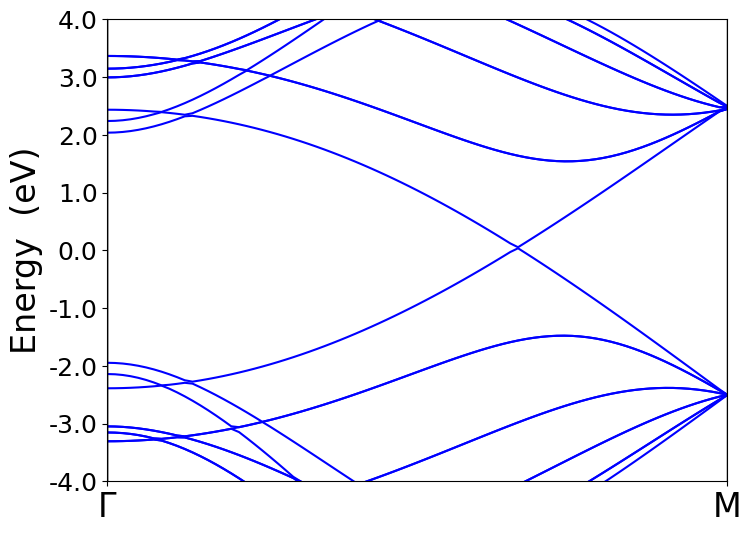

In [ ]:
# Define a high-symmetry path in the Brillouin zone
# The path follows: Γ → M
kbands = [[0., 0., 0.], [0.5, 0., 0.]]  # Γ → M

# Number of k-points along each segment for smooth band structure plotting
nkpts = [80]

# Compute the electronic band structure along the defined path
bands = egraph.bands_structure(include=['H'], lines=kbands, nkpts=nkpts)

# Plot the computed band structure
bands.plot_bands(xscale=True, klabels=[r'$\Gamma$', 'M'],
                 vertices=[0, 80],
                 spincolors=['blue'],
                 linestyle='-', emin=-4., emax=4.)

# Display the band structure plot
plt.show()

